In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("K-NEAREST NEIGHBORS (KNN) CLASSIFICATION")
print("Dataset: Iris Dataset")

# Step 1: Load and Explore the Dataset
print("\n1. LOADING AND EXPLORING THE DATASET")

# Load the dataset - UPDATE THIS PATH TO YOUR CSV FILE LOCATION
csv_path = "Iris.csv"  # Update this path
# For demonstration, I'll show how to load it
# df = pd.read_csv(csv_path)

# Alternative: Load from sklearn for demonstration
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nStatistical summary:")
print(df.describe())

print("\nClass distribution:")
print(df['species'].value_counts())

K-NEAREST NEIGHBORS (KNN) CLASSIFICATION
Dataset: Iris Dataset

1. LOADING AND EXPLORING THE DATASET
Dataset shape: (150, 5)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2

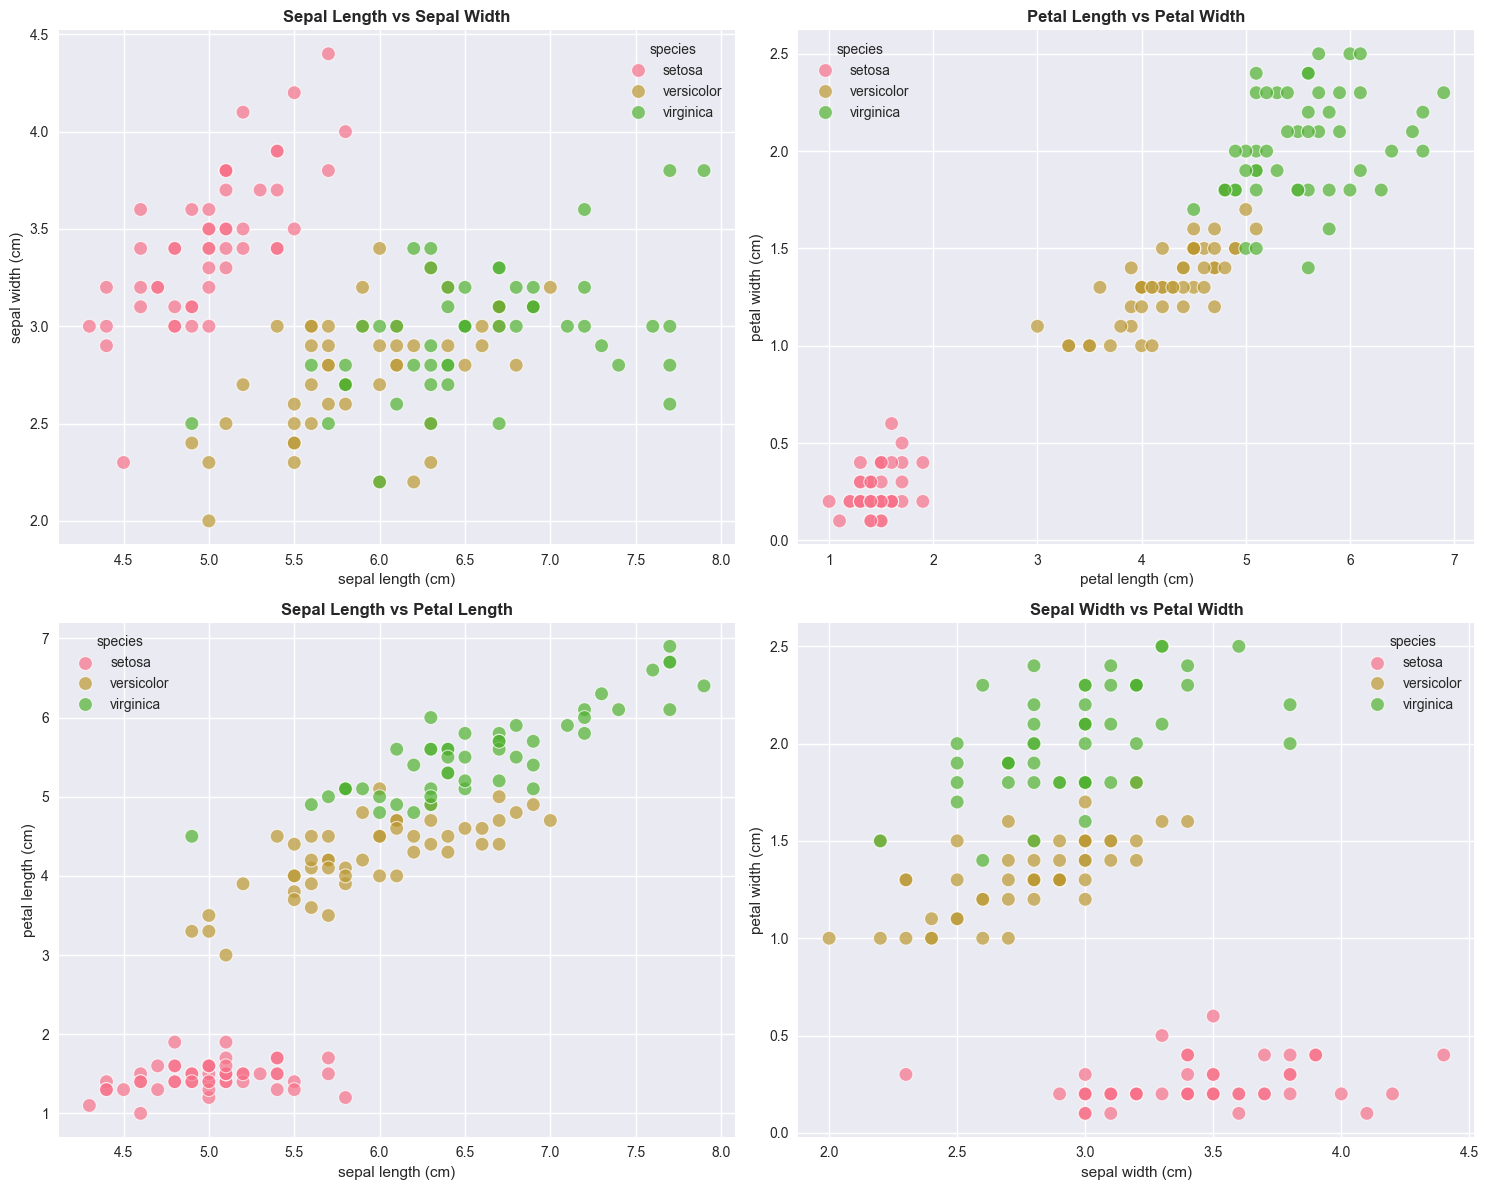

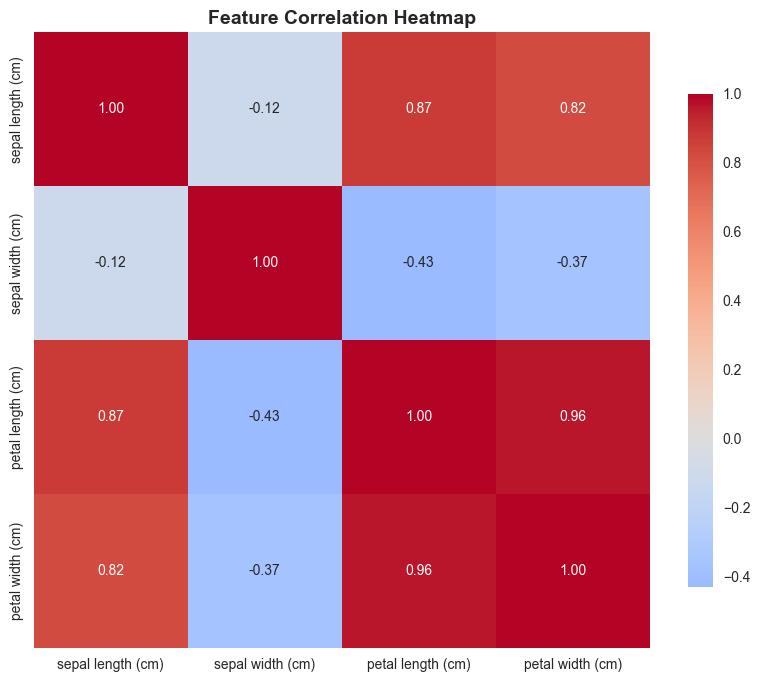

In [2]:
# Create subplots for visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Pairplot-style scatter plots
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Scatter plot 1: Sepal Length vs Sepal Width
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', 
                hue='species', ax=axes[0,0], s=100, alpha=0.7)
axes[0,0].set_title('Sepal Length vs Sepal Width', fontsize=12, fontweight='bold')

# Scatter plot 2: Petal Length vs Petal Width
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', 
                hue='species', ax=axes[0,1], s=100, alpha=0.7)
axes[0,1].set_title('Petal Length vs Petal Width', fontsize=12, fontweight='bold')

# Scatter plot 3: Sepal Length vs Petal Length  
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', 
                hue='species', ax=axes[1,0], s=100, alpha=0.7)
axes[1,0].set_title('Sepal Length vs Petal Length', fontsize=12, fontweight='bold')

# Scatter plot 4: Sepal Width vs Petal Width
sns.scatterplot(data=df, x='sepal width (cm)', y='petal width (cm)', 
                hue='species', ax=axes[1,1], s=100, alpha=0.7)
axes[1,1].set_title('Sepal Width vs Petal Width', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()

In [3]:
# Prepare features and target
X = df[features]
y = df['species']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Feature normalization/standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures normalized successfully!")
print("Original feature ranges:")
print(X_train.describe().loc[['min', 'max']])

print("\nNormalized feature ranges:")
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)
print(X_train_scaled_df.describe().loc[['min', 'max']])

Features shape: (150, 4)
Target shape: (150,)
Training set size: 105
Test set size: 45

Features normalized successfully!
Original feature ranges:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
min                4.3               2.0                1.1               0.1
max                7.9               4.4                6.9               2.5

Normalized feature ranges:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
min          -1.831968         -2.319098          -1.512085         -1.428871
max           2.359823          2.955385           1.754533          1.672555


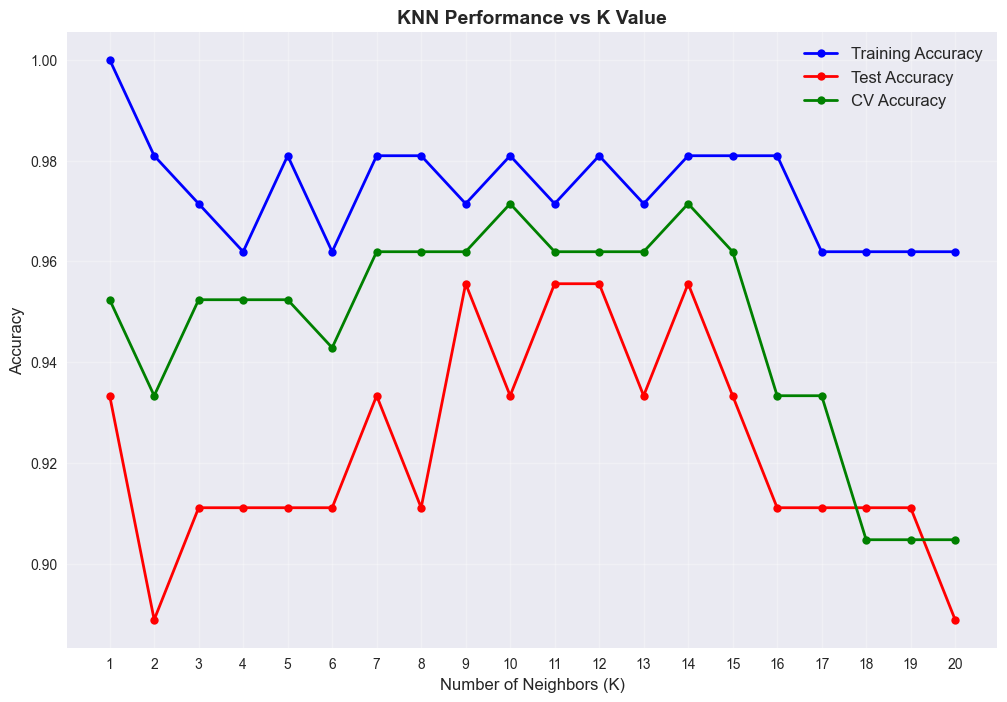

Optimal K based on cross-validation: 14
Best CV accuracy: 0.9714


In [4]:
# Test different values of K
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Training accuracy
    train_pred = knn.predict(X_train_scaled)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_acc)
    
    # Test accuracy
    test_pred = knn.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_acc)
    
    # Cross-validation score
    cv_score = cross_val_score(knn, X_train_scaled, y_train, cv=5).mean()
    cv_scores.append(cv_score)

# Plot K selection results
plt.figure(figsize=(12, 8))
plt.plot(k_values, train_accuracies, 'bo-', label='Training Accuracy', linewidth=2, markersize=6)
plt.plot(k_values, test_accuracies, 'ro-', label='Test Accuracy', linewidth=2, markersize=6)
plt.plot(k_values, cv_scores, 'go-', label='CV Accuracy', linewidth=2, markersize=6)
plt.xlabel('Number of Neighbors (K)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN Performance vs K Value', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.show()

# Find optimal K
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal K based on cross-validation: {optimal_k}")
print(f"Best CV accuracy: {max(cv_scores):.4f}")


In [5]:
# Train final model with optimal K
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = final_knn.predict(X_train_scaled)
y_test_pred = final_knn.predict(X_test_scaled)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.9810
Test Accuracy: 0.9556

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



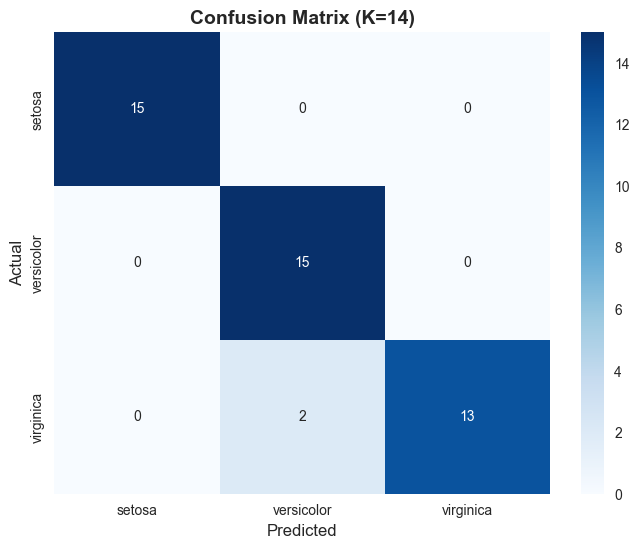

In [6]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title(f'Confusion Matrix (K={optimal_k})', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

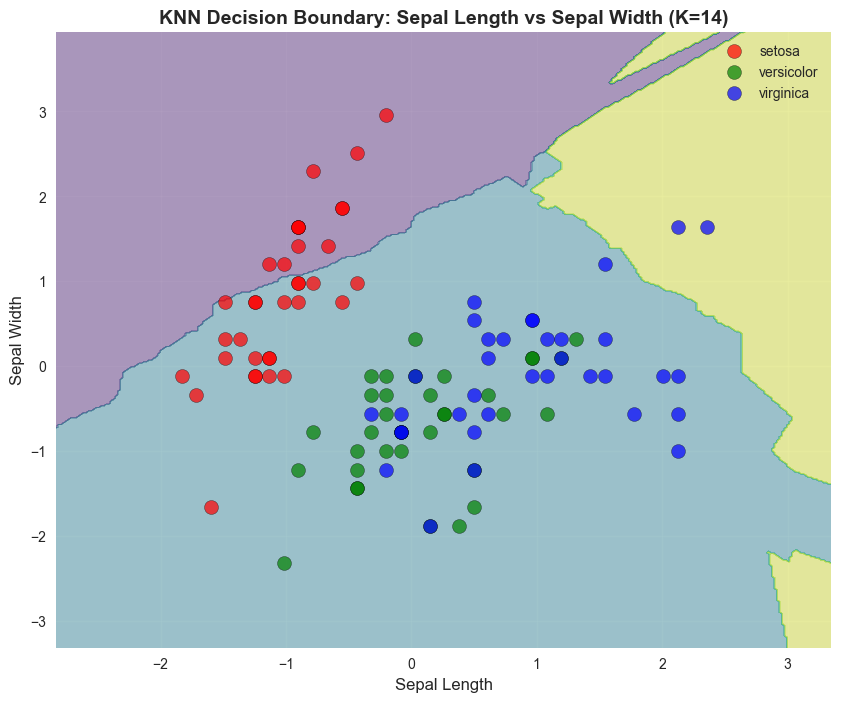

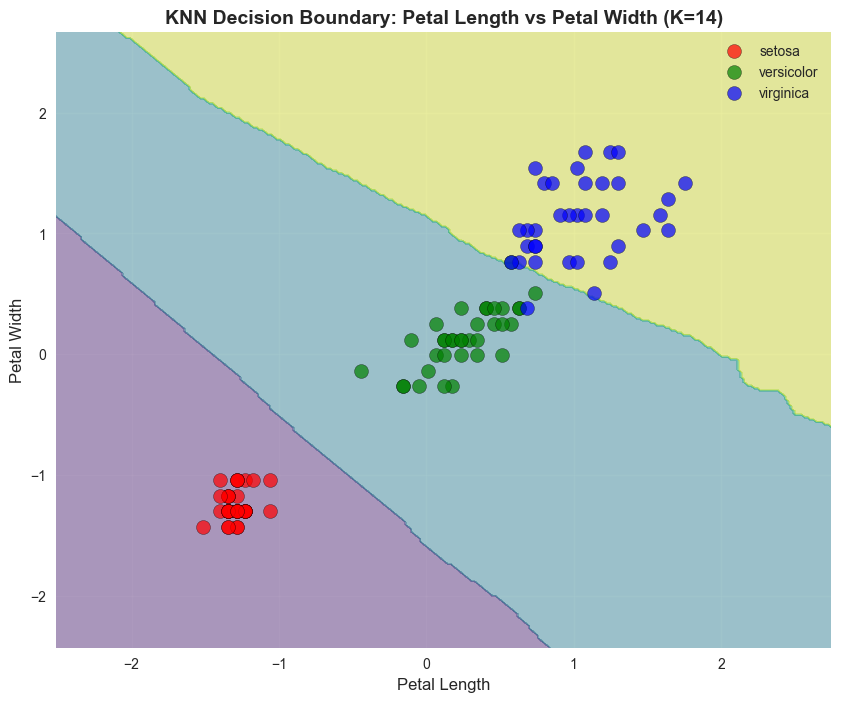

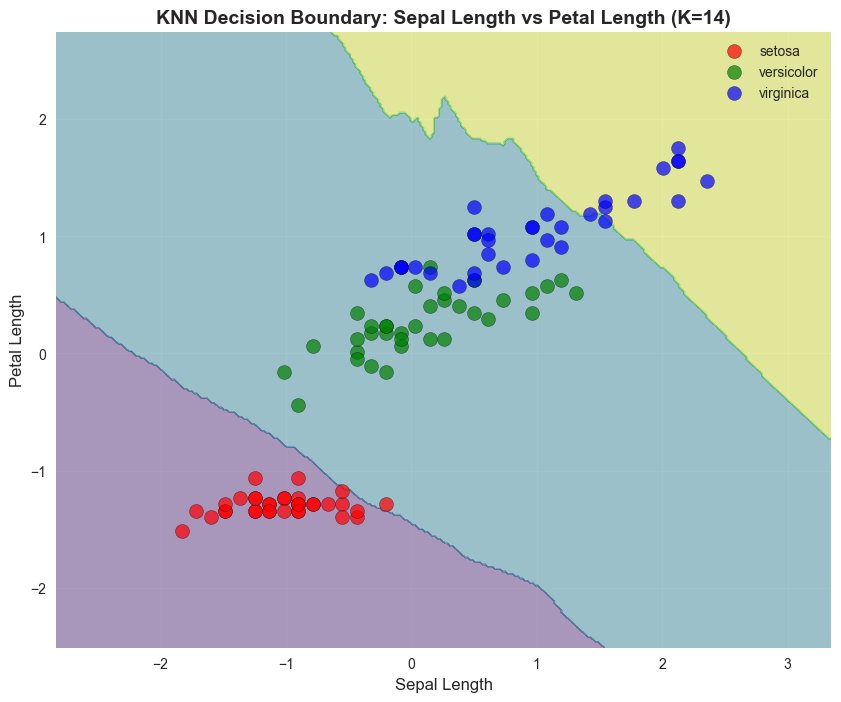

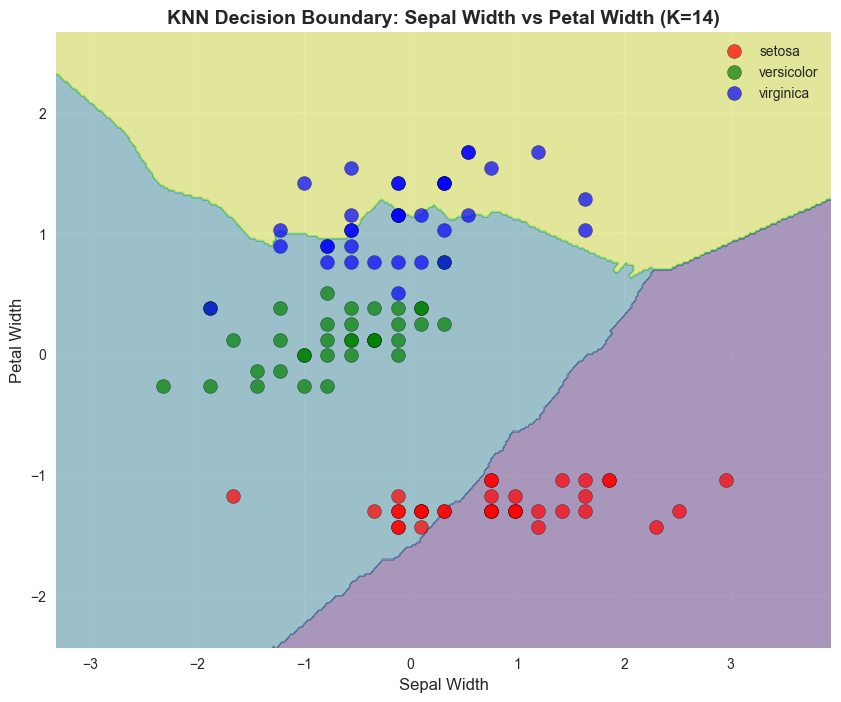

In [7]:
def plot_decision_boundary(X, y, model, feature_indices, feature_names, title):
    """Plot decision boundary for 2D feature space"""
    X_subset = X[:, feature_indices]
    
    # Create a mesh
    h = 0.02
    x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
    y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    # For prediction, we need all 4 features, so we'll use mean values for the other features
    full_mesh_points = np.zeros((mesh_points.shape[0], 4))
    full_mesh_points[:, feature_indices] = mesh_points
    
    # Set other features to their mean values
    other_indices = [i for i in range(4) if i not in feature_indices]
    for idx in other_indices:
        full_mesh_points[:, idx] = X[:, idx].mean()
    
    Z = model.predict(full_mesh_points)
    
    # Convert string labels to numeric for plotting
    unique_labels = np.unique(y)
    label_to_num = {label: i for i, label in enumerate(unique_labels)}
    Z_numeric = np.array([label_to_num[label] for label in Z])
    y_numeric = np.array([label_to_num[label] for label in y])
    
    Z_numeric = Z_numeric.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z_numeric, alpha=0.4, cmap='viridis')
    
    # Plot points
    colors = ['red', 'green', 'blue']
    for i, label in enumerate(unique_labels):
        mask = y == label
        plt.scatter(X_subset[mask, 0], X_subset[mask, 1], 
                   c=colors[i], label=label, s=100, alpha=0.7, edgecolors='black')
    
    plt.xlabel(feature_names[0], fontsize=12)
    plt.ylabel(feature_names[1], fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot decision boundaries for different feature pairs
feature_pairs = [
    ([0, 1], ['Sepal Length', 'Sepal Width']),
    ([2, 3], ['Petal Length', 'Petal Width']),
    ([0, 2], ['Sepal Length', 'Petal Length']),
    ([1, 3], ['Sepal Width', 'Petal Width'])
]

for indices, names in feature_pairs:
    plot_decision_boundary(X_train_scaled, y_train, final_knn, indices, names,
                          f'KNN Decision Boundary: {names[0]} vs {names[1]} (K={optimal_k})')


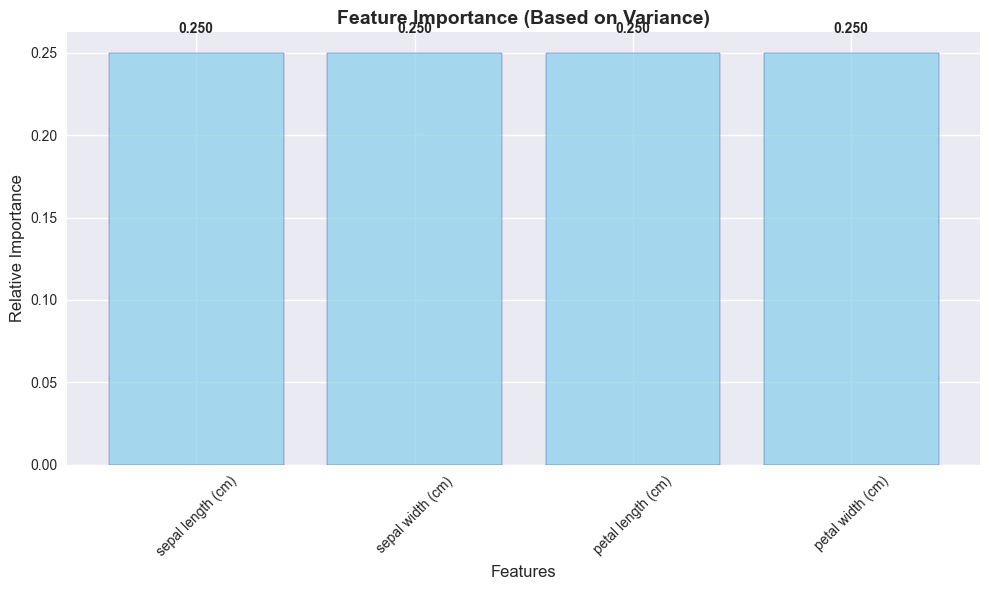


SUMMARY OF RESULTS
Optimal K value: 14
Test Accuracy: 0.9556 (95.56%)
Number of misclassified samples: 2 out of 45

Prediction confidence (average probability): 0.8810

Key Learnings:
1. Instance-based learning: KNN makes predictions based on similarity to training examples
2. Euclidean distance: Used to measure similarity between data points
3. K selection: Cross-validation helps find optimal K to balance bias-variance tradeoff
4. Feature scaling: Normalization is crucial for distance-based algorithms
5. Decision boundaries: KNN creates complex, non-linear decision boundaries


In [9]:
# Feature importance analysis (distance-based)
# Calculate average distances to nearest neighbors for each feature
feature_importance = []
for i, feature_name in enumerate(features):
    feature_values = X_train_scaled[:, i]
    avg_std = np.std(feature_values)
    feature_importance.append(avg_std)

feature_importance = np.array(feature_importance)
feature_importance = feature_importance / np.sum(feature_importance)  # Normalize

# Plot feature importance
plt.figure(figsize=(10, 6))
bars = plt.bar(features, feature_importance, color='skyblue', alpha=0.7, edgecolor='navy')
plt.title('Feature Importance (Based on Variance)', fontsize=14, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Relative Importance', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on bars
for bar, importance in zip(bars, feature_importance):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{importance:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Summary of results
print("\nSUMMARY OF RESULTS")
print(f"Optimal K value: {optimal_k}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Number of misclassified samples: {np.sum(y_test != y_test_pred)} out of {len(y_test)}")

# Predict probabilities for test set
y_test_proba = final_knn.predict_proba(X_test_scaled)
print(f"\nPrediction confidence (average probability): {np.mean(np.max(y_test_proba, axis=1)):.4f}")

print("\nKey Learnings:")
print("1. Instance-based learning: KNN makes predictions based on similarity to training examples")
print("2. Euclidean distance: Used to measure similarity between data points")
print("3. K selection: Cross-validation helps find optimal K to balance bias-variance tradeoff")
print("4. Feature scaling: Normalization is crucial for distance-based algorithms")
print("5. Decision boundaries: KNN creates complex, non-linear decision boundaries")